In [16]:
# General imports
import numpy as np
from nupack import *
import random
import time

# Problem 1

## a) Test tube ensemble defect

$\begin{align} C(\phi_{\Psi}, s_{\Psi}, y_{\Psi}) = \sum_{j\in\Psi} n(\phi_{j}, s_{j})min(x_{j}, y_{j}) + |\phi_j|max(y_{j}-x_{j}, 0) \end{align}$


The first term, which represents the structural defect, would become large if the on-target dimer is not dominated by the target secondary structure. The second term, which represents the concentration defect, would become large if off-target monomers or tetramers form at appreciable concentration.

## b) Test tube design

In [13]:
s = '((((((.....((((((((+)))))))).....((((((+)))))).((((((+)))))).))))))'

# find length of domains
splits = s.split('+')
l = []
for n in splits:
    l.append(len(n))
    
my_model = Model(material='dna', celsius=23)

# Define sequence domains
da = Domain('N' + str(l[0]), name='da')
db = Domain('N' + str(l[1]), name='db')
dc = Domain('N' + str(l[2]), name='dc')
dd = Domain('N' + str(l[3]), name='dd')

# Define strands containing these domains
sa = TargetStrand([da], name='sa')
sb = TargetStrand([db], name='sb')
sc = TargetStrand([dc], name='sc')
sd = TargetStrand([dd], name='sd')

# Define a target complex
target_complex = TargetComplex([sa, sb, sc, sd], s, name='target_complex')

#Define a target test tube containing all off-target complexes of up to 4 strands
target_tube = TargetTube(on_targets={target_complex: 1e-06}, off_targets=SetSpec(max_size=4), name='target_tube')

# Set a stop condition and a seed
my_options = DesignOptions(f_stop=0.04, seed=42)

# Define and run the test tube design job
my_design = tube_design(tubes=[target_tube], model=my_model, options=my_options)
my_results = my_design.run(trials=1)[0]

# Display the design results
my_results


<DesignResult: defect=0.039985>

## c) Design analysis on NUPACK

The design workd well! The target complex dominates the test tube (image 1) and has very high equilibrium base pairing probabilities (image 2). This is because test tube design optimizes of both target structure and concentration, while commplex design does not account for concentration.

Equilibirum complex concentrations (target complex dominates test tube):
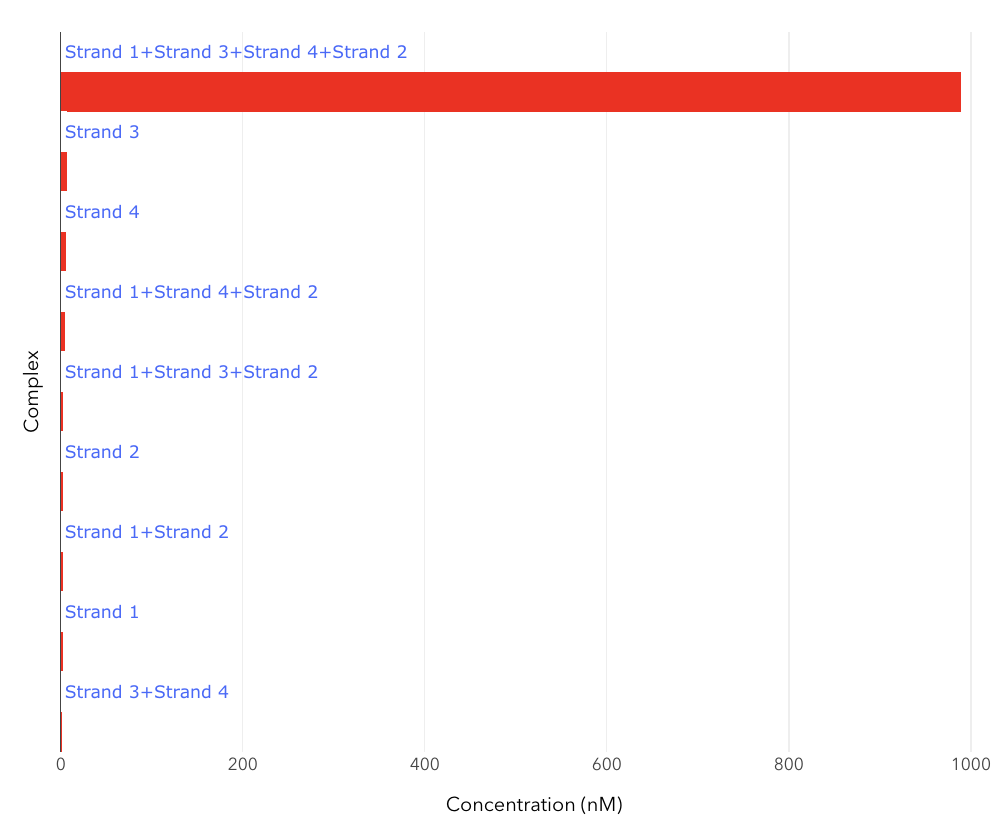

MFE of target complex:
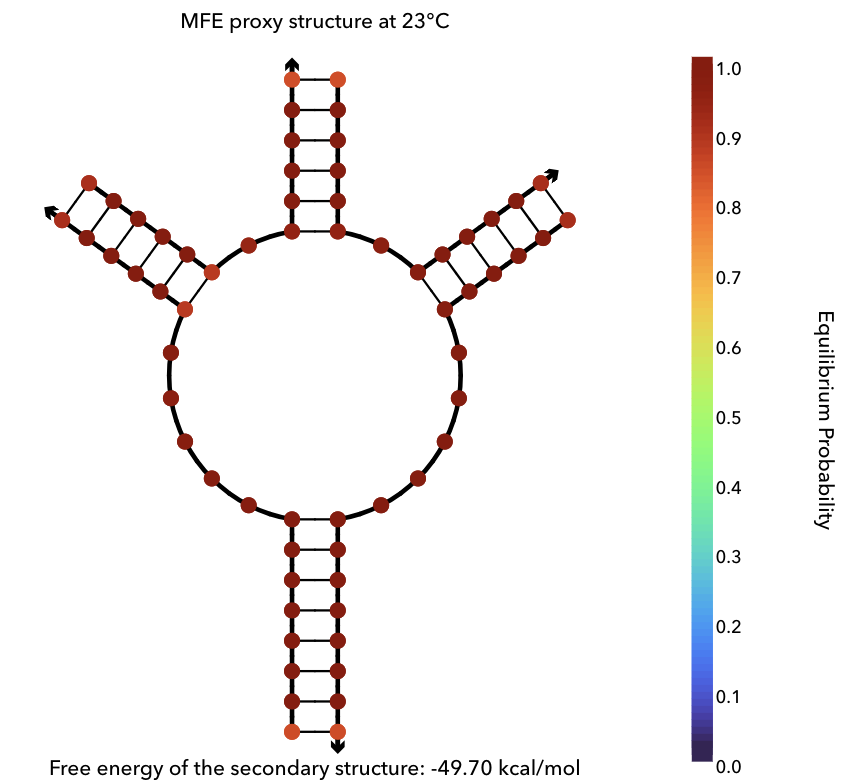

## d) Complex design evaluated over ensemble $\Psi$ with complexes up to 4 strands

In [15]:
#Define a target test tube containing all off-target complexes of up to 4 strands
target_tube2 = TargetTube(on_targets={target_complex: 1e-06}, off_targets=SetSpec(max_size=0), name='target_tube')

# Set a stop condition and a seed
my_options = DesignOptions(f_stop=0.04, seed=42)

# Define and run the test tube design job
my_design = tube_design(tubes=[target_tube2], model=my_model, options=my_options)
my_results = my_design.run(trials=1)[0]

# Evaluate complex design results in terms of tube properties
my_results.evaluate_with(tubes = [target_tube])

<DesignResult: defect=0.842505>

The complex design results in a signifcantly higher ensemble defect (~0.84 v ~0.04) than the test tube design. Most of the increase in ensemble defect is originating from the "Significant off-target complex concentrations" in the target tube rather than structural defects of the on-target complex. The test tube design had no off-targets of signicant concentration, while the complex design had 8.

# Problem 2

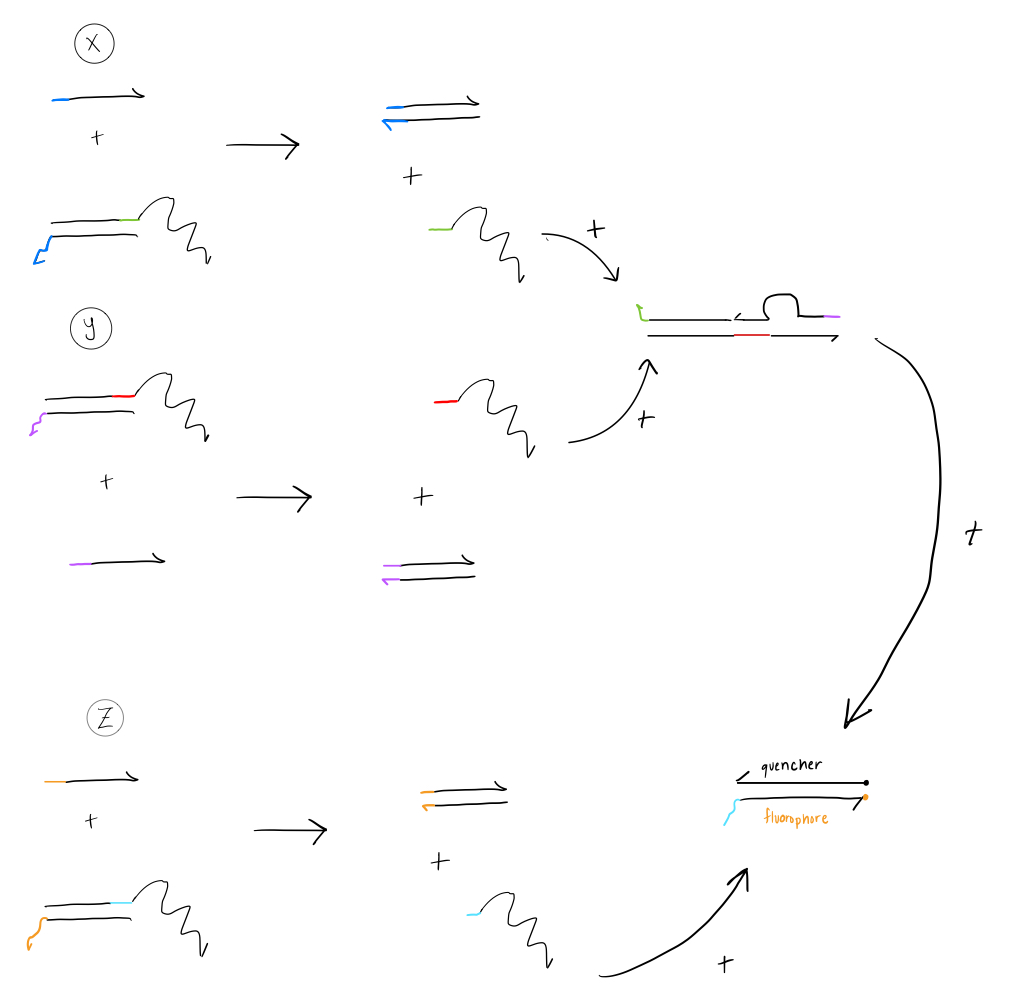